In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import the data

In [2]:
columns=["percentage","Feed","Solvent","Stages"]
# the address where the data is being saved might be different for different systems, should check and change manually.
data=pd.read_csv(r'C:\Users\Ashinth\Documents\courses\Sem 6\MT 2\crosscurrent_ML_data.txt',names=columns)
data.head()

,percentage,Feed,Solvent,Stages
0,62.750,1990.7,1027.3,2
1,62.997,1938.7,1007.7,2
2,63.346,1960.9,1029.6,2
3,63.947,1950.2,1042.2,2
4,64.204,1931.9,1040.4,2


In [3]:
#in case if percentage turns out to be more than 100 %, we remove those data
l=len(data)
for i in range(l):
    if(data["percentage"].iloc[i]>100):
        data=data.iloc[1:i-1]
        break

## Splitting the data into input and response 

In [4]:
data1=data.copy()
Y=data1.pop("percentage") # consisting of the percentages(i.e the responses)
X=data1

## split the data again into training and testing parts

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

# ANN Model 

In [6]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


## Fit the model

In [7]:
scaler_1=MinMaxScaler() #Using MinMaxScaler
scaler_2=MinMaxScaler()
#converting the series into a numpy array before transforming
X_train_1, y_train_1 = np.array(X_train), np.array(y_train)
X_test_1, y_test_1 = np.array(X_test), np.array(y_test)

X_train_1=scaler_1.fit_transform(X_train_1)
y_train_1=scaler_2.fit_transform(y_train_1.reshape(-1,1))

X_test_1=scaler_1.transform(X_test_1)
y_test_1=scaler_2.transform(y_test_1.reshape(-1,1))

In [8]:
model.fit(X_train_1,y_train_1,epochs=100, verbose=1)

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.3054
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/100
38/38 [=================

## Predictions of the test values

In [9]:
predicted_values=model.predict(X_test_1)
y_predictions=scaler_2.inverse_transform(predicted_values)

10/10 [==============================] - 0s 2ms/step


In [10]:
y_predictions=scaler_2.inverse_transform(predicted_values)

# Variations of percentage extracted with the feed and solvent flow rate

In [11]:
data.pop("Stages")
data_plot=data

Text(0.5, 0.92, 'Variation of percentages with number of stages and Solvent flow rate')

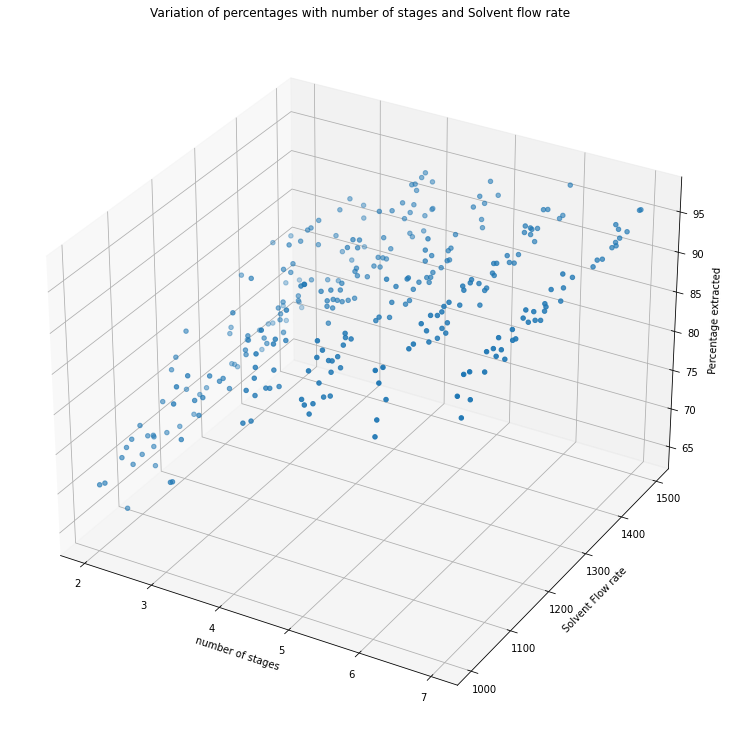

In [12]:
figure=plt.figure(figsize=[13,13])
ax=plt.axes(projection='3d')
ax.scatter3D(X_test.Stages,X_test.Solvent, y_test)
ax.set_xlabel("number of stages")
ax.set_ylabel("Solvent Flow rate")
ax.set_zlabel("Percentage extracted")
ax.set_title("Variation of percentages with number of stages and Solvent flow rate")

Text(0.5, 0.92, 'Variation of percentages with number of stages and Solvent flow rate')

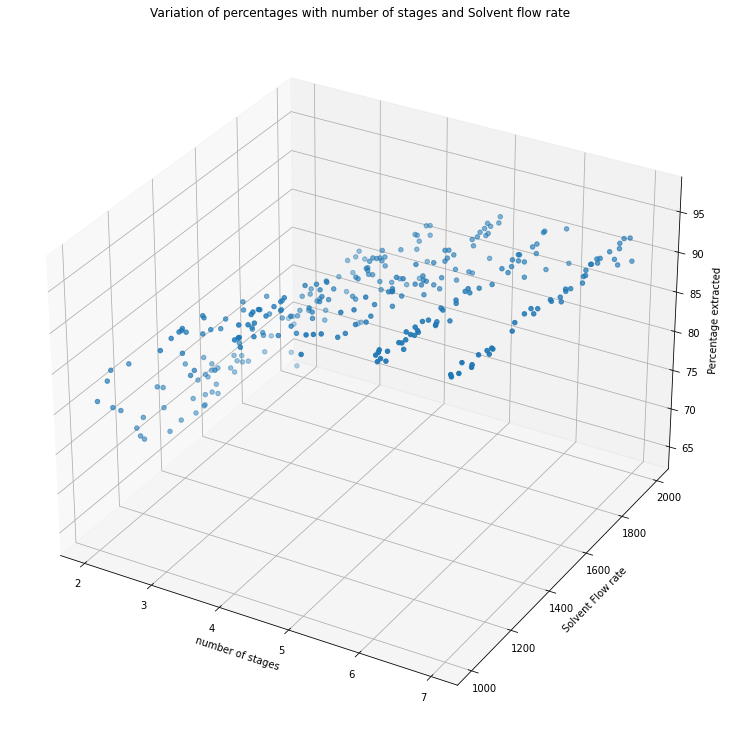

In [13]:
figure=plt.figure(figsize=[13,13])
ax=plt.axes(projection='3d')
ax.scatter3D(X_test.Stages,X_test.Feed, y_test)
ax.set_xlabel("number of stages")
ax.set_ylabel("Solvent Flow rate")
ax.set_zlabel("Percentage extracted")
ax.set_title("Variation of percentages with number of stages and Solvent flow rate")

In [14]:
y_predictions = [num for sublist in y_predictions for num in sublist]

# Error distribuiton

Text(0.5, 1.0, 'Distribution of error in predictions for total of .300 models')

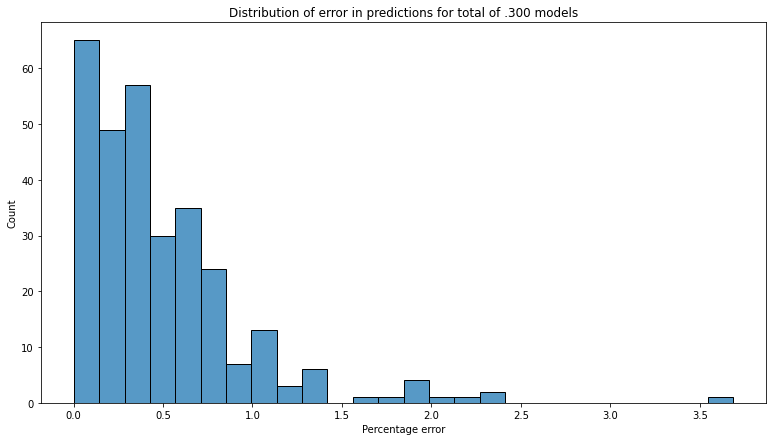

In [15]:
error=abs(y_test-y_predictions)*100/y_test
plt.figure(figsize=[13,7])
sns.histplot(error)
plt.xlabel("Percentage error")
plt.title("Distribution of error in predictions for total of .{} models".format(len(y_test)))

The remaining part is the contour plot, for which I am yet to prepare the data as a large number of datapoints are required

Text(0.5, 1.0, 'Predicted vs Actual')

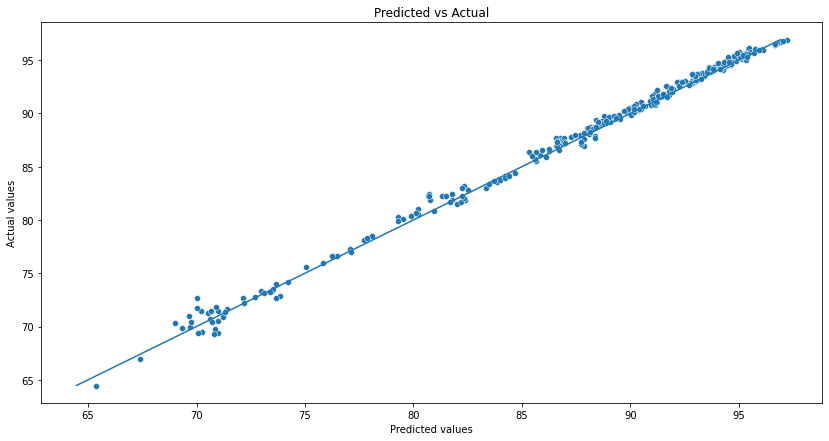

In [16]:
plt.figure(figsize=[14,7])
sns.scatterplot(x=y_predictions,y=y_test)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual")